In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score,precision_score,f1_score,confusion_matrix,accuracy_score,roc_curve, RocCurveDisplay,roc_auc_score

In [22]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\student_study_habits.csv",encoding='latin1')
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [23]:
df.shape

(500, 13)

In [24]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [26]:
df.isnull().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [27]:
duplicates=df.duplicated().sum()
print(duplicates)

0


In [28]:
df=df.drop_duplicates()
print(df.shape)

(500, 13)


In [29]:
df.fillna(df.median(numeric_only=True), inplace=True)

EDA:

In [30]:
df['pass_fail'] = (df['final_grade'] >= 50).astype(int)

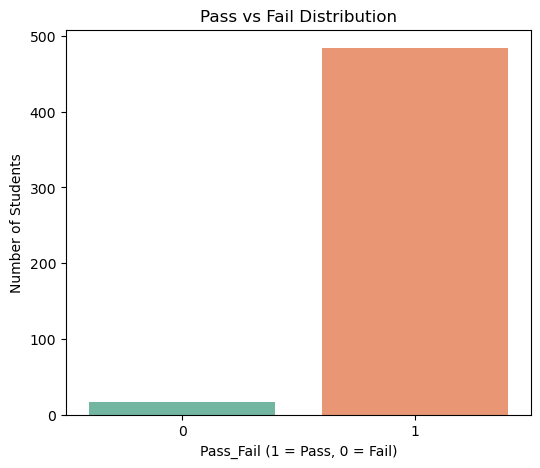

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(x="pass_fail",hue="pass_fail", data=df, palette="Set2",legend=False)

plt.title("Pass vs Fail Distribution")
plt.xlabel("Pass_Fail (1 = Pass, 0 = Fail)")
plt.ylabel("Number of Students")
plt.show()

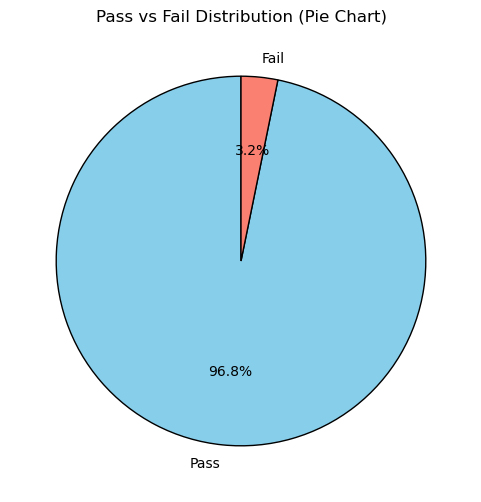

In [32]:
plt.figure(figsize=(6,6))
df['pass_fail'].value_counts().plot(
    kind='pie',
    labels=['Pass','Fail'],
    autopct='%1.1f%%',
    colors=['skyblue','salmon'],
    startangle=90,
    wedgeprops={'edgecolor':'black'}
)
plt.title("Pass vs Fail Distribution (Pie Chart)")
plt.ylabel("")
plt.show()

In [33]:
if "final_grade" in df.columns:
    df["pass_fail"] = (df["final_grade"] >= 50).astype(int)

In [34]:
X = df[["study_hours_per_week", "attendance_percentage",
        "assignments_completed", "sleep_hours_per_day"]]
y = df["pass_fail"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
nb = GaussianNB()

rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
nb_pred = nb.predict(X_test)

rf_proba = rf.predict_proba(X_test)[:,1]
nb_proba = nb.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nRandom Forest Report:\n", classification_report(y_test, rf_pred))
print("Naive Bayes Report:\n", classification_report(y_test, nb_pred))

Random Forest Accuracy: 0.97
Naive Bayes Accuracy: 0.96

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.97      1.00      0.98        96

    accuracy                           0.97       100
   macro avg       0.98      0.62      0.69       100
weighted avg       0.97      0.97      0.96       100

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.96      1.00      0.98        96

    accuracy                           0.96       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.92      0.96      0.94       100



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

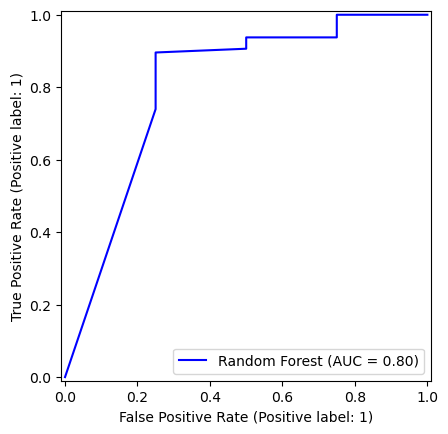

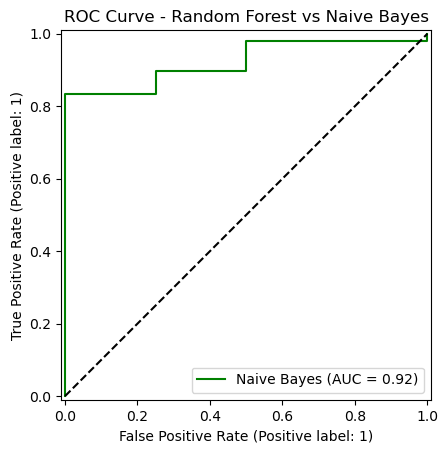

In [36]:
plt.figure(figsize=(6,6))
RocCurveDisplay.from_predictions(y_test, rf_proba, name="Random Forest", color="blue")
RocCurveDisplay.from_predictions(y_test, nb_proba, name="Naive Bayes", color="green")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - Random Forest vs Naive Bayes")
plt.show()


In [42]:
new_student = pd.DataFrame([{
    "study_hours_per_week": 0.238285993,
    "attendance_percentage": 0.416197081,
    "assignments_completed": 0.222222222,
    "sleep_hours_per_day": 0,
}])

In [43]:
rf_prediction = rf.predict(new_student)[0]
nb_prediction = nb.predict(new_student)[0]

print("\nPrediction for new student:")
print("Random Forest:", "Pass" if rf_prediction==1 else "Fail")
print("Naive Bayes:", "Pass" if nb_prediction==1 else "Fail")


Prediction for new student:
Random Forest: Fail
Naive Bayes: Fail
